In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

## Minimum Variance Portfolio Backtest.

In [2]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [3]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 225
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.DNK.value(shrinkage_type="linear", window_size=365 * 20)

In [4]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=0,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [5]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:46<00:00,  6.06it/s]


StrategyStatistics:
* final_nav = 10.614711
* geom_avg_total_r = 0.132293
* geom_avg_xs_r = 0.104008
* std_xs_r = 0.123762
* min_xs_r = -0.091195
* max_xs_r = 0.074834
* skew = -0.250317
* kurtosis = 18.707630
* max_dd = -0.277776
* sharpe = 0.840390
* alpha_buy_hold = 0.054721
* tracking_error_buy_hold = 0.158314
* ir_buy_hold = 0.345650
* factor_loadings = {'low_risk': 0.5487472090005341, 'momentum': -0.051385981806777795, 'quality': 0.0579337653019622, 'size': 0.06076016383799054, 'value': -0.2534402990251458, 'spx': 0.614374616286403}
* alpha_benchmark = 0.059926
* alpha_benchmark_pvalue = 0.000967
* tracking_error_benchmark = 0.075315
* ir_benchmark = 0.795666
* ttest_pval = 0.275143
* levene_pval = 0.000000
* timing_ability_coef = -0.051160
* timing_ability_pval = 0.000387

In [6]:
result.std_xs_r, result.sharpe

(0.12376190028102085, 0.840390399296782)

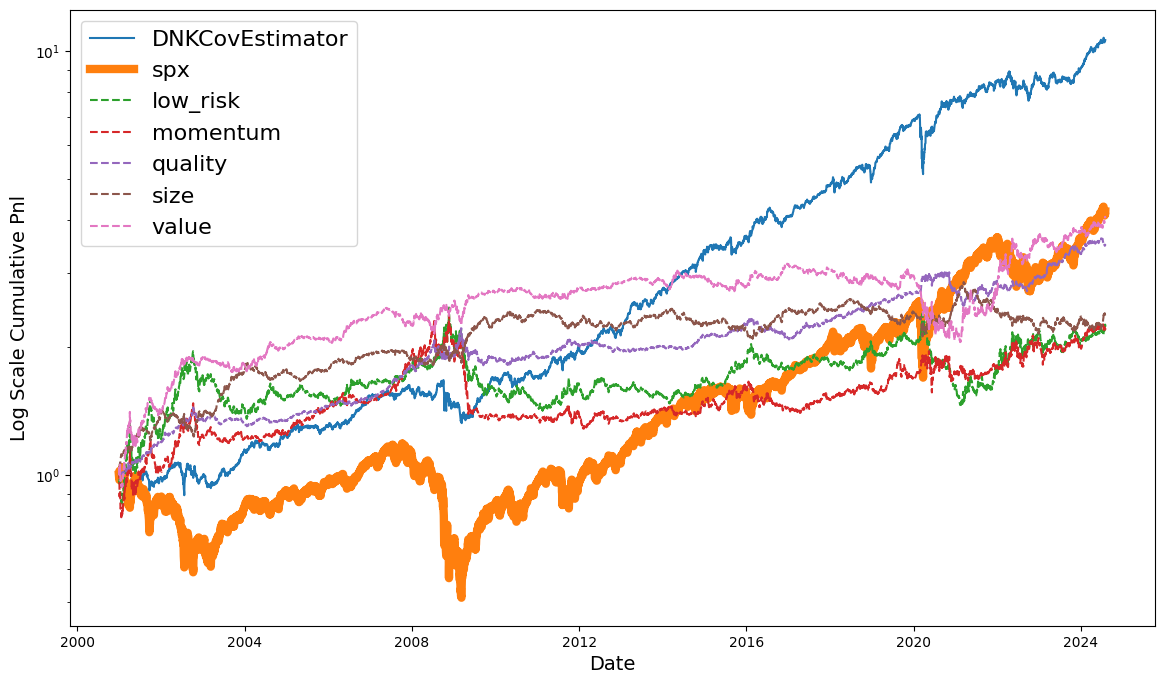

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

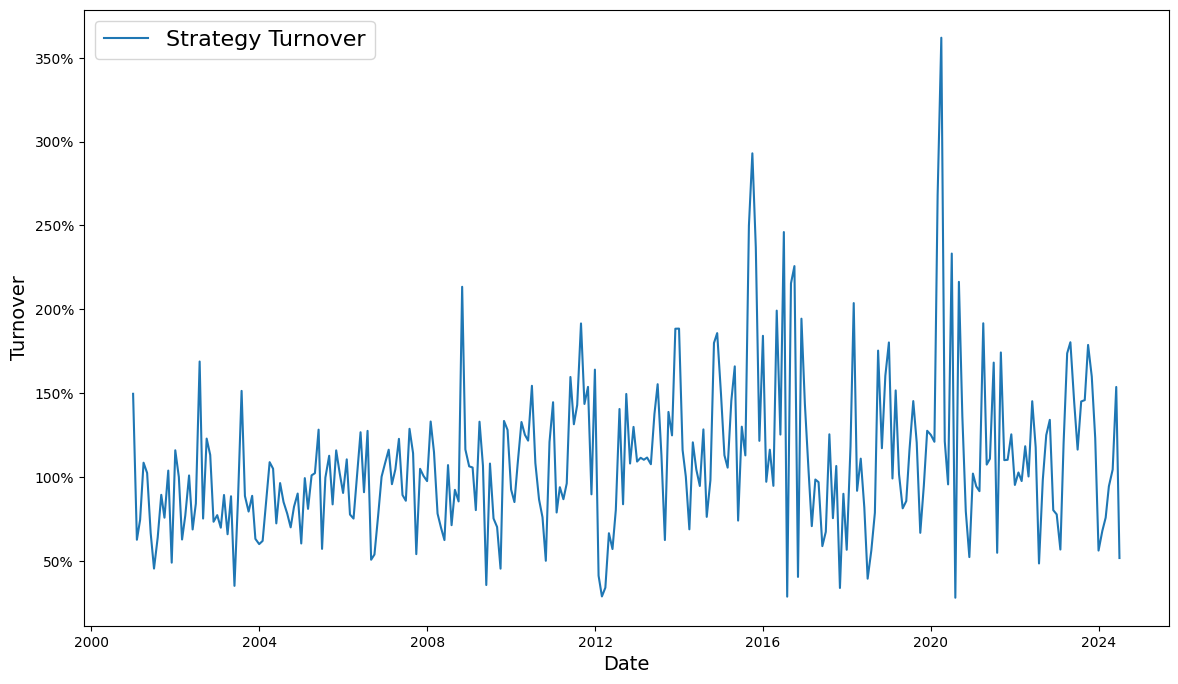

In [8]:
runner.plot_turnover()

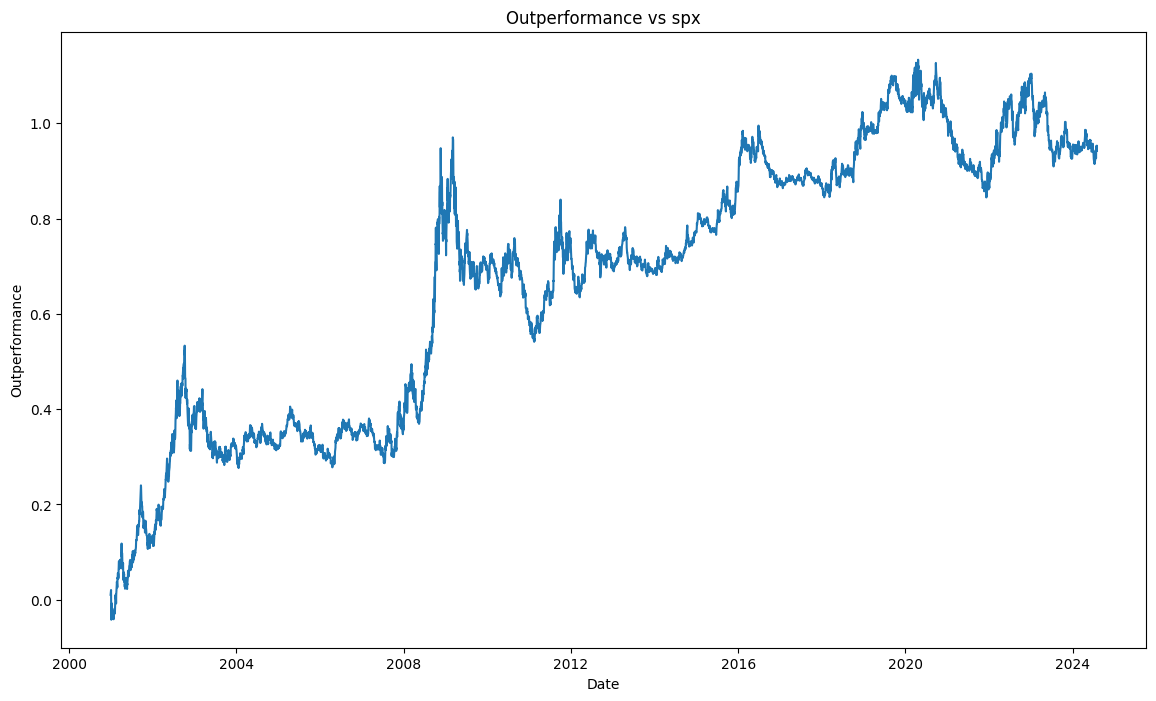

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")